In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt


seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Path to the dataset
healthy_dir = '../PlantVillage/Tomato_healthy'
mold_dir = '../PlantVillage/Tomato_Leaf_Mold'


img_size = (128, 128)


def load_and_preprocess(folder_path, label):
    images = []
    labels = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        img_array = img_array / 255.0 
        images.append(img_array)
        labels.append(label)
    return images, labels

healthy_images, healthy_labels = load_and_preprocess(healthy_dir, 0) 
mold_images, mold_labels = load_and_preprocess(mold_dir, 1) 

X = np.concatenate([healthy_images, mold_images], axis=0)
y = np.concatenate([healthy_labels, mold_labels], axis=0)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

model.save('../Model/tomato_disease_detection_model.h5')


Epoch 1/10
51/51 [==============================] - 13s 241ms/step - loss: 0.4342 - accuracy: 0.7750 - val_loss: 0.0900 - val_accuracy: 0.9656
Epoch 2/10
51/51 [==============================] - 12s 230ms/step - loss: 0.0513 - accuracy: 0.9828 - val_loss: 0.0546 - val_accuracy: 0.9803
Epoch 3/10
51/51 [==============================] - 11s 223ms/step - loss: 0.0540 - accuracy: 0.9816 - val_loss: 0.0367 - val_accuracy: 0.9926
Epoch 4/10
51/51 [==============================] - 11s 225ms/step - loss: 0.0679 - accuracy: 0.9705 - val_loss: 0.0373 - val_accuracy: 0.9853
Epoch 5/10
51/51 [==============================] - 11s 225ms/step - loss: 0.0432 - accuracy: 0.9816 - val_loss: 0.0637 - val_accuracy: 0.9828
Epoch 6/10
51/51 [==============================] - 12s 227ms/step - loss: 0.0220 - accuracy: 0.9939 - val_loss: 0.0324 - val_accuracy: 0.9853
Epoch 7/10
51/51 [==============================] - 12s 228ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.0311 - val_accuracy: 0.9902

c:\Users\Tarun Samala\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 23ms/step


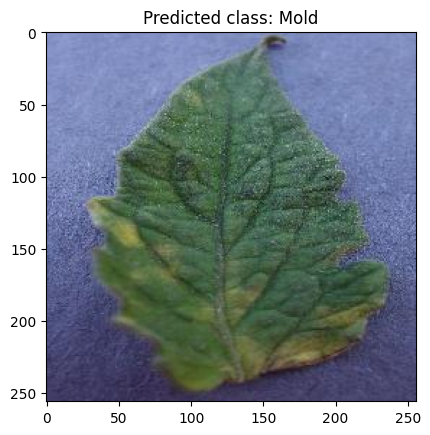

In [5]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the trained model

# Function to preprocess a single image
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array[np.newaxis, ...]  # Add batch dimension

image_path = '../PlantVillage/Tomato_Leaf_Mold/0a555f63-bf03-4958-8993-e1932b8dce9f___Crnl_L.Mold 9064.JPG'

input_image = preprocess_image(image_path)

prediction = model.predict(input_image)

predicted_class = "Mold" if prediction[0][0] > 0.5 else "Healthy"

plt.imshow(load_img(image_path))
plt.title(f'Predicted class: {predicted_class}')
plt.show()